# Neural Networks and ML in Tensorflow and Keras

In supervised learning, parametric models are those where the model is a function of a fixed form with a number of unknown _parameters_. Together with a loss function and a training set, an optimizer can select parameters to minimize the loss with respect to the training set. One of the most common optimizers is stochastic gradient descent (SGD). It tweaks the parameters slightly to move the loss "downhill" due to a small batch of examples from the training set.

### Linear & Logistic Regression

In linear regression, we fit a line (technically a hyperplane) that predicts a target variable, $y$, based on some features $x$. The form of this model is affine (even if we call it "linear"):  

$$y_{hat} = xW + b$$

where $W$ and $b$ are weights and an offset, respectively, and are the parameters of this parametric model. The loss function that the optimizer uses to fit these parameters is the squared error ($||\cdots||_2$) between the prediction and the ground truth in the training set.

Logistic regression also fits a line –– this time separating the positive and negative examples of a binary classifier. The form of this model is similar: 

$$y_{hat} = \sigma(xW + b)$$

where again $W$ and $b$ are the parameters of this model, and $\sigma$ is the [sigmoid function](https://en.wikipedia.org/wiki/Sigmoid_function) which maps non-normalized scores ("logits") to values $\hat{y} \in [0,1]$ that represent probabilities. The loss function that the optimizer uses to fit these parameters is the cross entropy between the prediction and the ground truth in the training set.

This pattern of an affine transform, $xW + b$, occurs over and over in ML.

### Load and Visualize Data

We'll start by loading some data and taking a quick look at it. In this notebook, we'll build a simple binary classifier based on two floating point features.

In [1]:
# Import libraries
import data
%matplotlib inline
from matplotlib import pyplot as plt

(2500, 2)
(500, 2)


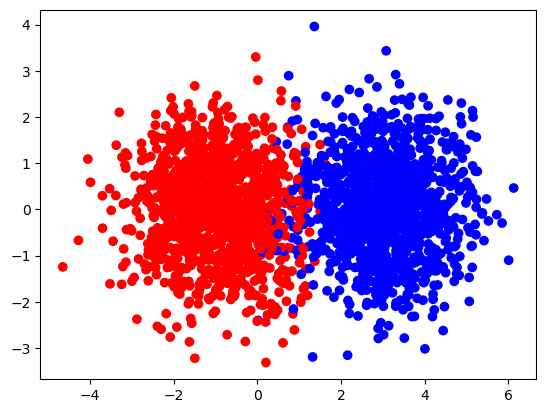

In [2]:
# Generate and partition data - then check its shape
X_train, y_train, X_test, y_test = data.generate_data(2500, 500) #large test size to make diagrams better
print(X_train.shape)
print(X_test.shape)

# Visualize data
plt.scatter(X_train[:,0], X_train[:,1], c=y_train, cmap='bwr');

### Training Logistic Regression

Given the visual above, it's clear that the data is separable with a vertical line. The simplest model we can use for this data is logistic regression.

In [3]:
# Add tensorflow for NN construction
import tensorflow as tf
from tensorflow import keras

# Confirm version
print(tf.__version__)

2023-05-16 06:06:03.136518: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


2.11.0


In [4]:
# Build sequential model where specified layers are stacked each on top of previous layers
linear_model = keras.Sequential([
    # Dense is an affine (xW + b) layer followed by an element wise nonlinearity
    keras.layers.Dense(1, activation='sigmoid')
])

# Adam optimizer is a fancier version of gradient descent (https://arxiv.org/pdf/1412.6980.pdf)
linear_model.compile(optimizer='adam',
              loss='binary_crossentropy',  # from information theory
              metrics=['accuracy'])        # metric to output as we train

# Fit/train model
linear_model.fit(X_train, y_train, epochs=15)

Epoch 1/15


2023-05-16 06:06:05.381903: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


79/79 [==============================] - 1s 1ms/step - loss: 1.8062 - accuracy: 0.1532
Epoch 2/15
79/79 [==============================] - 0s 1ms/step - loss: 1.6666 - accuracy: 0.1520
Epoch 3/15
79/79 [==============================] - 0s 1ms/step - loss: 1.5345 - accuracy: 0.1580
Epoch 4/15
79/79 [==============================] - 0s 1ms/step - loss: 1.4084 - accuracy: 0.1612
Epoch 5/15
79/79 [==============================] - 0s 1ms/step - loss: 1.2894 - accuracy: 0.1696
Epoch 6/15
79/79 [==============================] - 0s 1ms/step - loss: 1.1795 - accuracy: 0.1844
Epoch 7/15
79/79 [==============================] - 0s 1ms/step - loss: 1.0774 - accuracy: 0.2056
Epoch 8/15
79/79 [==============================] - 0s 1ms/step - loss: 0.9846 - accuracy: 0.2320
Epoch 9/15
79/79 [==============================] - 0s 1ms/step - loss: 0.9000 - accuracy: 0.2732
Epoch 10/15
79/79 [==============================] - 0s 1ms/step - loss: 0.8243 - accuracy: 0.3404
Epoch 11/15
79/79 [===========

A well-initialized random classifier tends to output a uniform distribution. For each example in the batch, we compute the cross-entropy loss of the label (`[1, 0]` or `[0, 1]`) against the model's output (`~[0.5, 0.5]`). Both cases result in $-\lg(0.5) = lg(2) = 1.0$.

Of course, this random classifier won't output exactly uniform distributions (it's random after all), but we can anticipate it being pretty close.

Now we'll use this model to make predictions on the test set.

16/16 [==============================] - 0s 1ms/step


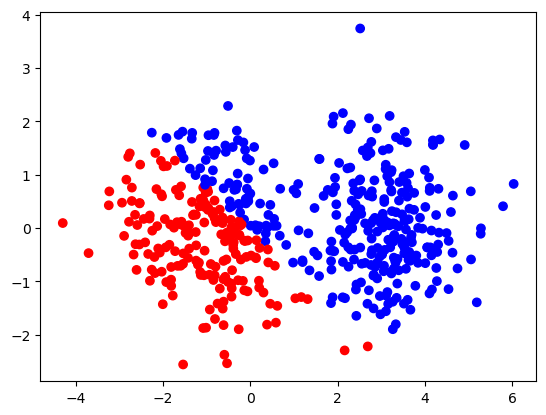

In [5]:
# Generate predictions from the model using test set data
predictions = linear_model.predict(X_test)

# Visualize predictions
plt.scatter(X_test[:,0], X_test[:,1], c=predictions[:,0]>0.5, cmap='bwr')

### More Challenging Classification Problem

In the case above, the data was linearly separablem making it fine for a simple linear classifier.

Now we'll investigate a slightly more challenging classification problem, where the data is visualized below.

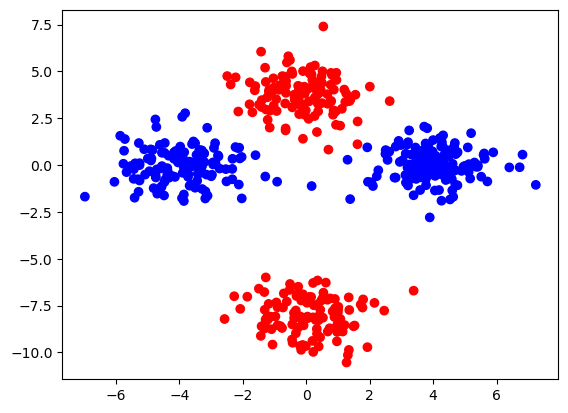

In [6]:
# Generate and partition data
X_train, y_train, X_test, y_test = data.generate_non_linear_data(2500, 500)

# Visualize data
plt.scatter(X_test[:,0], X_test[:,1], c=y_test, cmap='bwr')

In [7]:
# Fit/train model
linear_model.fit(X_train, y_train, epochs=10)

Epoch 1/10
79/79 [==============================] - 0s 1ms/step - loss: 0.7191 - accuracy: 0.5056
Epoch 2/10
79/79 [==============================] - 0s 1ms/step - loss: 0.6960 - accuracy: 0.5072
Epoch 3/10
79/79 [==============================] - 0s 1ms/step - loss: 0.6884 - accuracy: 0.5056
Epoch 4/10
79/79 [==============================] - 0s 1ms/step - loss: 0.6822 - accuracy: 0.5052
Epoch 5/10
79/79 [==============================] - 0s 1ms/step - loss: 0.6776 - accuracy: 0.5052
Epoch 6/10
79/79 [==============================] - 0s 1ms/step - loss: 0.6740 - accuracy: 0.5088
Epoch 7/10
79/79 [==============================] - 0s 1ms/step - loss: 0.6718 - accuracy: 0.5132
Epoch 8/10
79/79 [==============================] - 0s 1ms/step - loss: 0.6700 - accuracy: 0.5224
Epoch 9/10
79/79 [==============================] - 0s 1ms/step - loss: 0.6690 - accuracy: 0.5304
Epoch 10/10
79/79 [==============================] - 0s 1ms/step - loss: 0.6682 - accuracy: 0.5564


Again, we'll use this model to make predictions on the test set.

16/16 [==============================] - 0s 1ms/step


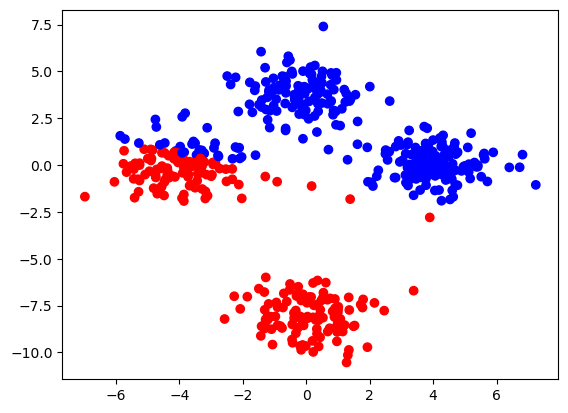

In [8]:
# Generate predictions from the model using test set data
predictions = linear_model.predict(X_test)

# Visualize data
plt.scatter(X_test[:,0], X_test[:,1], c=predictions[:,0]>0.5, cmap='bwr')

### Building a Deeper Network for Modeling

The results above are okay-ish... We'll now build a sequential neural network to improve model performance. Initialization of the network is random, but we'll try to achieve some consistently good results.

In [9]:
# Define basic NN sequential model
deep_model = keras.Sequential([
    keras.layers.Dense(64, activation = "relu"),
    keras.layers.Dense(1, activation='sigmoid')
])

# Compile NN with optimizer and loss function
deep_model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Fit/train model
deep_model.fit(X_train, y_train, epochs=10)

Epoch 1/10
79/79 [==============================] - 1s 1ms/step - loss: 0.4654 - accuracy: 0.8084
Epoch 2/10
79/79 [==============================] - 0s 1ms/step - loss: 0.1576 - accuracy: 0.9964
Epoch 3/10
79/79 [==============================] - 0s 1ms/step - loss: 0.0790 - accuracy: 0.9976
Epoch 4/10
79/79 [==============================] - 0s 1ms/step - loss: 0.0500 - accuracy: 0.9976
Epoch 5/10
79/79 [==============================] - 0s 1ms/step - loss: 0.0363 - accuracy: 0.9976
Epoch 6/10
79/79 [==============================] - 0s 1ms/step - loss: 0.0284 - accuracy: 0.9976
Epoch 7/10
79/79 [==============================] - 0s 1ms/step - loss: 0.0235 - accuracy: 0.9976
Epoch 8/10
79/79 [==============================] - 0s 1ms/step - loss: 0.0201 - accuracy: 0.9976
Epoch 9/10
79/79 [==============================] - 0s 1ms/step - loss: 0.0176 - accuracy: 0.9976
Epoch 10/10
79/79 [==============================] - 0s 1ms/step - loss: 0.0159 - accuracy: 0.9976


16/16 [==============================] - 0s 1ms/step


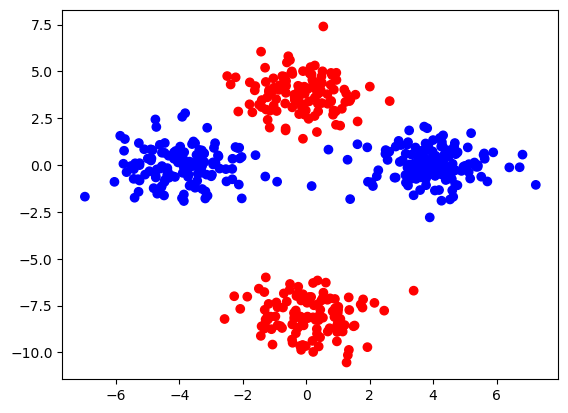

In [10]:
# Generate predictions from the model using test set data
predictions = deep_model.predict(X_test)

# Visualize data
plt.scatter(X_test[:,0], X_test[:,1], c=predictions[:,0]>0.5, cmap='bwr')

In [11]:
# Define another narrow NN sequential model with multiple, consistently-sized layers
narrow_model = keras.Sequential([
    keras.layers.Dense(6, activation = "relu"),
    keras.layers.Dense(6, activation = "relu"),
    keras.layers.Dense(6, activation = "relu"),
    keras.layers.Dense(6, activation = "relu"),
    keras.layers.Dense(6, activation = "relu"),
    keras.layers.Dense(1, activation='sigmoid')
])

# Compile NN with optimizer and loss function
narrow_model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Fit/train model
narrow_model.fit(X_train, y_train, epochs=10)

Epoch 1/10
79/79 [==============================] - 1s 2ms/step - loss: 0.5775 - accuracy: 0.6968
Epoch 2/10
79/79 [==============================] - 0s 2ms/step - loss: 0.4296 - accuracy: 0.8232
Epoch 3/10
79/79 [==============================] - 0s 2ms/step - loss: 0.3303 - accuracy: 0.9588
Epoch 4/10
79/79 [==============================] - 0s 2ms/step - loss: 0.2599 - accuracy: 0.9840
Epoch 5/10
79/79 [==============================] - 0s 2ms/step - loss: 0.1881 - accuracy: 0.9904
Epoch 6/10
79/79 [==============================] - 0s 2ms/step - loss: 0.1229 - accuracy: 0.9932
Epoch 7/10
79/79 [==============================] - 0s 2ms/step - loss: 0.0743 - accuracy: 0.9948
Epoch 8/10
79/79 [==============================] - 0s 2ms/step - loss: 0.0446 - accuracy: 0.9940
Epoch 9/10
79/79 [==============================] - 0s 2ms/step - loss: 0.0296 - accuracy: 0.9956
Epoch 10/10
79/79 [==============================] - 0s 2ms/step - loss: 0.0213 - accuracy: 0.9956


16/16 [==============================] - 0s 1ms/step


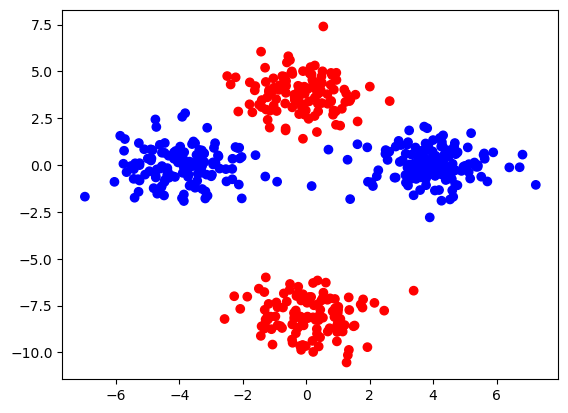

In [12]:
# Generate predictions from the model using test set data
n_predictions = narrow_model.predict(X_test)

# Visualize data
plt.scatter(X_test[:,0], X_test[:,1], c=n_predictions[:,0]>0.5, cmap='bwr')

Now we'll explore the Keras Functional API as an alternative to the Sequential model, which is a simplified way to create a Tensorflow model using Keras.

Let's imagine that we want to take the input features we used above, but now we want to pass the same input into two separate Dense layers, then concatenate the vectors that come out of them (would be especially helpful if we had two different types of input or wanted to generate multiple different outputs). With the Functional API, we first instantiate each layer, specifying any parameters like the dimension (number of neurons). Then, we "call" the layer we just created, using another set of parentheses to pass in whatever the input to that layer is. That's how we connect the layers: we save the output from one layer and then pass it as input to the layer that should come after. Essentially we will build our model by repeating:

```layer_output = layer(earlier_layer_output)```

The order in which we define the layers does not matter. Once defined, we can connect them.

We also have to explicitly define an input layer, so that we can pass it into the first hidden layer in the model. We also have to define an output layer.

We'll now rebuild the earlier model using the Functional API.

In [13]:
# Define the input layer
input_layer = keras.layers.Input(shape=(2,), dtype='int64')

# Define hidden layers and activation functions
dense_1 = keras.layers.Dense(10, activation='relu')  
dense_2 = keras.layers.Dense(10, activation='relu')
dense_3 = keras.layers.Dense(10, activation='relu')

# Connect the NN together
dense_1_out = dense_1(input_layer)
dense_2_out = dense_2(dense_1_out)
dense_3_out = dense_3(dense_2_out)

# Define a binary classification layer
classification_layer = keras.layers.Dense(1, activation='sigmoid')(dense_3_out)

Now we just need a few more lines of code to define the overall model and then compile it and train it. To define the model, we'll specify the initial inputs and final outputs and couple them with the connected NN.

In [14]:
# Define the complete model, specifying the overall inputs and outputs
func_model = tf.keras.models.Model(inputs=[input_layer], outputs=[classification_layer])

# Compile NN with optimizer and loss function
func_model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Fit/train model
func_model.fit(X_train, y_train, epochs=10)

Epoch 1/10
79/79 [==============================] - 1s 2ms/step - loss: 0.6321 - accuracy: 0.7188
Epoch 2/10
79/79 [==============================] - 0s 2ms/step - loss: 0.3279 - accuracy: 0.9932
Epoch 3/10
79/79 [==============================] - 0s 2ms/step - loss: 0.1288 - accuracy: 0.9952
Epoch 4/10
79/79 [==============================] - 0s 2ms/step - loss: 0.0500 - accuracy: 0.9956
Epoch 5/10
79/79 [==============================] - 0s 2ms/step - loss: 0.0279 - accuracy: 0.9956
Epoch 6/10
79/79 [==============================] - 0s 2ms/step - loss: 0.0201 - accuracy: 0.9956
Epoch 7/10
79/79 [==============================] - 0s 2ms/step - loss: 0.0165 - accuracy: 0.9960
Epoch 8/10
79/79 [==============================] - 0s 2ms/step - loss: 0.0143 - accuracy: 0.9952
Epoch 9/10
79/79 [==============================] - 0s 2ms/step - loss: 0.0130 - accuracy: 0.9964
Epoch 10/10
79/79 [==============================] - 0s 2ms/step - loss: 0.0119 - accuracy: 0.9948


16/16 [==============================] - 0s 1ms/step


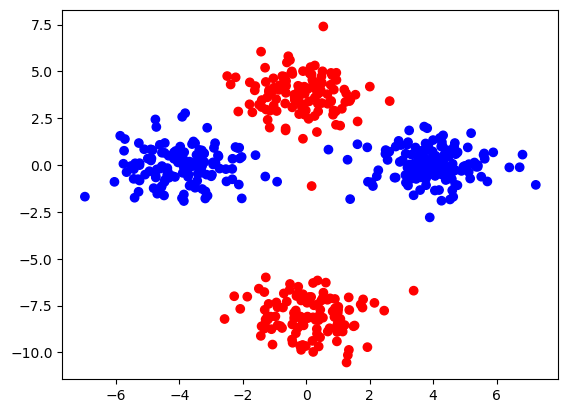

In [15]:
# Generate predictions from the model using test set data
predictions = func_model.predict(X_test)

# Visualize data
plt.scatter(X_test[:,0], X_test[:,1], c=predictions[:,0]>0.5, cmap='bwr')

Note: Modeled results are still imperfect, but certainly better with a NN!